In [169]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [170]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [171]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,65,36,45,20.879744,82.002744,6.502985,202.935536,rice
1,89,42,45,21.770462,80.319644,7.038096,226.655537,rice
2,88,38,40,23.004459,82.320763,7.840207,263.964248,rice
3,68,41,45,26.491096,80.158363,6.980401,242.864034,rice
4,98,43,44,20.130175,81.604873,7.628473,262.717340,rice


In [172]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,91,35,29,26.774637,66.413269,6.780064,177.774507,coffee
2196,120,16,28,27.417112,56.636362,6.086922,127.924610,coffee
2197,112,28,25,24.131797,67.225123,6.362608,173.322839,coffee
2198,105,25,31,26.272418,52.127394,6.758793,127.175293,coffee
2199,96,20,29,23.603016,60.396475,6.779833,140.937041,coffee


In [173]:
df.size

17600

In [174]:
df.shape

(2200, 8)

In [175]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [176]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [177]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [178]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: >

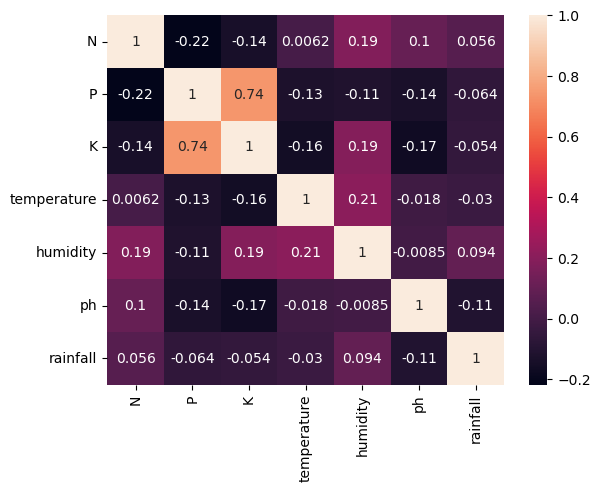

In [179]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Seperating features and target label

In [180]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [181]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [182]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.22727272727272
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.82      0.90        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.74      0.95      0.83        21
       mango       1.00      0.85      0.92        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [186]:
score

array([0.93863636, 0.9       , 0.91363636, 0.87045455, 0.93181818])

### Saving trained Decision Tree model

In [187]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [188]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [189]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99318182, 0.98863636])

### Saving trained Guassian Naive Bayes model

In [190]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [191]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [192]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.98863636, 0.97954545, 0.97727273])

In [193]:
#Saving trained SVM model

In [194]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and applies logistic regression
LogReg = make_pipeline(StandardScaler(), LogisticRegression(random_state=2, max_iter=500, solver='saga'))

# Train the model on the training data
LogReg.fit(Xtrain, Ytrain)

# Predict on the test set
predicted_values = LogReg.predict(Xtest)

# Calculate accuracy
x = accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')

# Print the accuracy
print("Logistic Regression's Accuracy is: ", x)

# Print the classification report
print(classification_report(Ytest, predicted_values))

Logistic Regression's Accuracy is:  0.9613636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      1.00      0.98        21
      coffee       0.96      1.00      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       0.96      1.00      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [196]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.975     , 0.94772727, 0.975     , 0.96136364, 0.96363636])

### Saving trained Logistic Regression model

In [197]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [199]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99318182, 0.99318182, 0.99318182])

### Saving trained Random Forest model

In [200]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [201]:
# %pip install xgboost
import xgboost as xgb
XB = xgb.XGBClassifier()
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report

# Encode string labels into numeric values
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Train the XGBoost model
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the test set
predicted_values_encoded = XB.predict(Xtest)

# Decode predicted labels back to original string values
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# Evaluate the model's accuracy
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [202]:
# Cross validation score (XGBoost)
target_encoded = label_encoder.fit_transform(target)
score = cross_val_score(XB, features, target_encoded, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", score)
print("Mean Accuracy:", score.mean())
print("Standard Deviation:", score.std())

Cross-Validation Accuracy Scores: [0.99090909 0.99545455 0.99090909 1.         0.99090909]
Mean Accuracy: 0.9936363636363638
Standard Deviation: 0.003636363636363615


### Saving trained XGBoost model

In [203]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

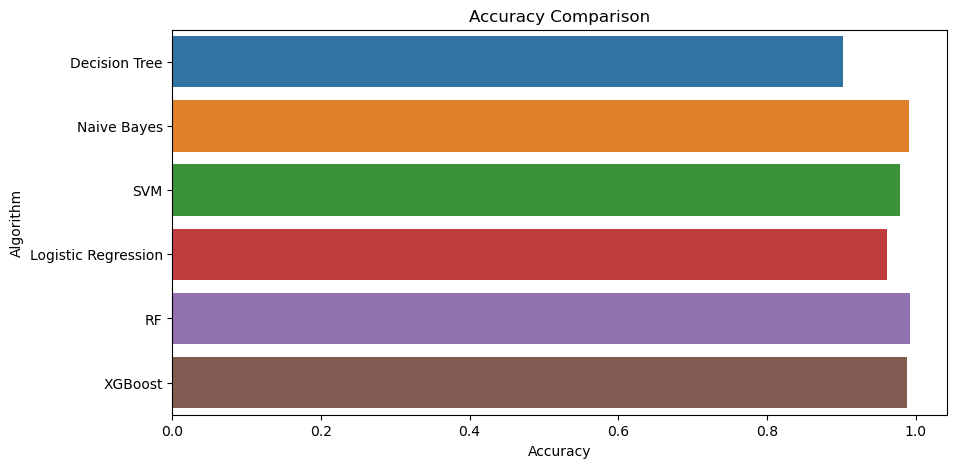

In [204]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model, hue=model, legend=False)

In [205]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9022727272727272
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9613636363636363
RF --> 0.9931818181818182
XGBoost --> 0.9886363636363636


In [206]:
best_model = max(accuracy_models, key=accuracy_models.get)
best_accuracy = accuracy_models[best_model]
print(f"Model with the highest accuracy: {best_model} --> {best_accuracy}")

Model with the highest accuracy: RF --> 0.9931818181818182


## Making a prediction

In [207]:
feature_names = ['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']

data = pd.DataFrame([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]], columns=feature_names)
prediction = RF.predict(data)
print(prediction)

['coffee']


In [208]:
data = pd.DataFrame([[83, 45, 60, 28, 70.3, 7.0, 150.9]], columns=feature_names)
# Make the prediction
prediction = RF.predict(data)
print(prediction)

['jute']
